## ОЦЕНКА И УЛУЧШЕНИЕ КАЧЕСТВА МОДЕЛИ

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# создаем синтетический набор данных
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=0)
# создаем экземпляр модели и подгоняем его на обучающем наборе
logreg = LogisticRegression().fit(X_train, y_train)
logreg.score(X_test, y_test)

0.88

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=5000)

scores = cross_val_score(logreg, iris.data, iris.target)
print('Значения правильности перекрестной проверки: {}'. \
      format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [4]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('Значения правильности перекрестной проверки: {}'. \
      format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [5]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(
    scores.mean()))

Средняя правильность перекрестной проверки: 0.97


In [6]:
print('Метки ирисов:\n{}'.format(iris.target))

Метки ирисов:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


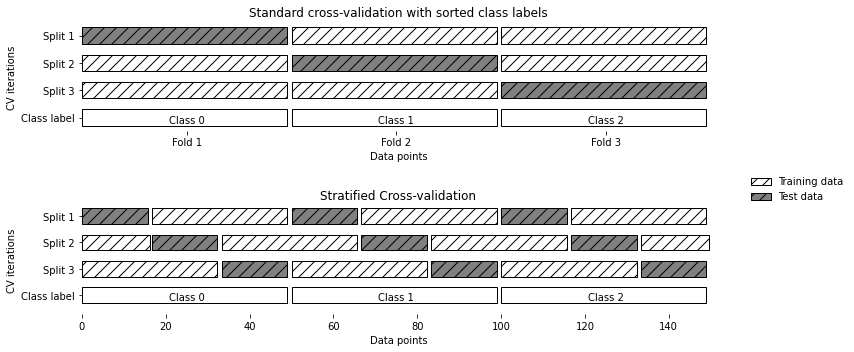

In [7]:
mglearn.plots.plot_stratified_cross_validation()

In [8]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
print("Значения правильности перекрестной проверки:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [9]:
kfold = KFold(n_splits=3)

print("Значения правильности перекрестной проверки:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0. 0. 0.]


In [10]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print("Значения правильности перекрестной проверки:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0.98 0.96 0.96]


In [11]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  150
Средняя правильность: 0.97


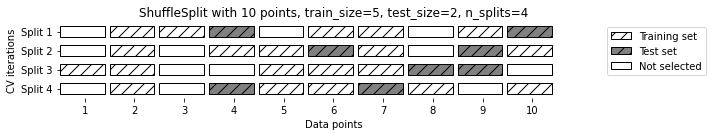

In [12]:
mglearn.plots.plot_shuffle_split()

In [13]:
from sklearn.model_selection import ShuffleSplit

snuffle_split = ShuffleSplit(test_size=.5, train_size=.5, 
                             n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target,
                        cv=snuffle_split)
print("Значения правильности перекрестной проверки:\n{}". \
      format(scores))

Значения правильности перекрестной проверки:
[0.93333333 0.97333333 0.96       0.96       0.93333333 0.93333333
 0.96       0.94666667 0.98666667 0.97333333]


In [14]:
from sklearn.model_selection import GroupKFold

# создам синтетический набор данных
X, y = make_blobs(n_samples=12, random_state=0)
# предположим, что первые три примера относятся к одной и той же 
# группе, затем следующие четыре и так далее
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, 
                        cv=GroupKFold(n_splits=3))
print("Значения правильности перекрестной проверки:\n{}". \
      format(scores))

Значения правильности перекрестной проверки:
[0.75       0.6        0.66666667]


/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [15]:
# реализация наивного решетчатого поиска
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                iris.target, random_state=0)
print("Размер обучающего набора: {} размер тестового набора: {}". \
      format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обуаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_test, y_test)
        # если получаем наилучшее значение правильности, сохраняем
        # значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

            print("Наилучшее значение правильности: {:.2f}". \
                  format(best_score))
print("Наилучшие значения параметров: {}".format(best_parameters))

Размер обучающего набора: 112 размер тестового набора: 38
Наилучшее значение правильности: 0.24
Наилучшее значение правильности: 0.58
Наилучшее значение правильности: 0.92
Наилучшее значение правильности: 0.97
Наилучшие значения параметров: {'C': 100, 'gamma': 0.001}


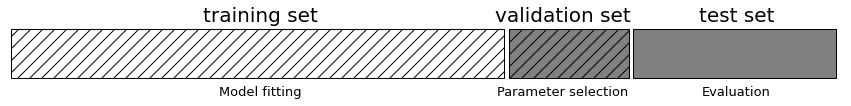

In [16]:
mglearn.plots.plot_threefold_split()

In [17]:
# разбиваем данные на обучающий+проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# разбиваем обучющий+проверочный набор на обучающий и проверочный
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval,
                                    y_trainval, random_state=0)
print("Размер обучающего набора: {}\nРазмер проверочного набора:\
{}\nРазмер тестового набора: {}\n".format(X_train.shape[0],
                            X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        # оцениваем качество SVC на проверочном наборе
        score = svm.score(X_valid, y_valid)
        # если получаем наилучшее значение правильности, 
        # сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате 
# объединения обучающих и проверочных данных, 
# оцениваем качество модели на тестовом наборе
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: \
{:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: \
{:.2f}".format(test_score))

Размер обучающего набора: 84
Размер проверочного набора:28
Размер тестового набора: 38

Лучшее значение правильности на проверочном наборе: 1.00
Наилучшие значения параметров:  {'C': 100, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.97


In [18]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров,
        # обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        # выполняем перекрестную проверку
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # вычисляем среднюю правильность перекрестной проверки
        score = np.mean(scores)
        # если получаем лучшее значение правильности, 
        # сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате
# объединения обучающих и проверочных данных
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, gamma=0.001)

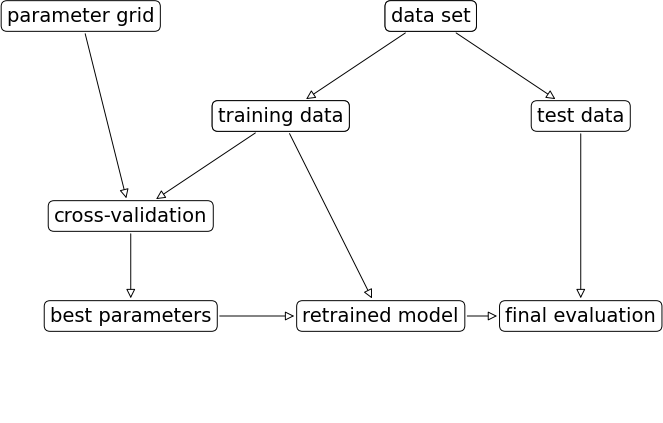

In [19]:
mglearn.plots.plot_grid_search_overview()

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Сетка параметров:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, x_test, y_train, y_test = train_test_split(iris.data, 
                            iris.target, random_state=0)

grid_search.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(
    grid_search.score(X_test, y_test)))

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Правильность на тестовом наборе: 0.97


In [21]:
print("Наилучшие значения параметров: {}".format(
    grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: \
{:.2f}".format(grid_search.best_score_))
print("Наилучшая модель:\n{}".format(grid_search.best_estimator_))

Наилучшие значения параметров: {'C': 10, 'gamma': 0.1}
Наилучшее значение кросс-валидац. правильности: 0.97
Наилучшая модель:
SVC(C=10, gamma=0.1)


In [22]:
import pandas as pd

#  преобразуем в DataFrame
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000966,0.000253,0.000425,0.000181,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001233,0.000377,0.000480,0.000120,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000854,0.000115,0.000408,0.000135,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.001101,0.000249,0.000556,0.000224,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001082,0.000235,0.000435,0.000158,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


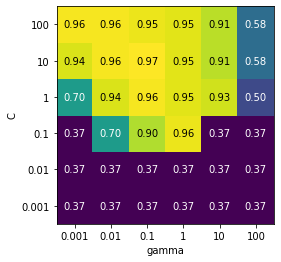

In [23]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# строим теплокарту средних знач. правильности перекрестной проверки
mglearn.tools.heatmap(scores, xlabel='gamma', 
                     xticklabels=param_grid['gamma'], ylabel='C', 
                    yticklabels=param_grid['C'], cmap='viridis')

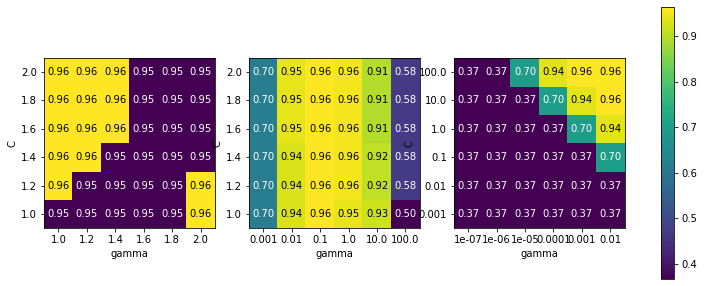

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
    param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score']. \
    reshape(6, 6)
    # строим теплокарту ср. знач. правильности перекрестной проверки
    scores_image = mglearn.tools.heatmap(
    scores, xlabel='gamma', ylabel='C', 
        xticklabels=param_grid['gamma'],
    yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

In [30]:
param_grid = [{'kernel': ['rbf'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel': ['linear'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],}]
print('List og grids: \n{}'.format(param_grid))

List og grids: 
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [36]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Наилучшие значения параметров: {}".format(
    grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности:{:.2f}".
      format(grid_search.best_score_))

Наилучшие значения параметров: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Наилучшее значение кросс-валидац. правильности:0.97


In [37]:
results = pd.DataFrame(grid_search.cv_results_)
# мы выводим транспонированную таблицу для лучшего отображения
# на странице
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000916433,0.000846577,0.000784016,0.00122771,0.000905657,0.00074563,0.00082345,0.000636578,0.000654888,0.000658894,...,0.00044322,0.000542784,0.000931168,0.000927496,0.000575542,0.00052743,0.000475216,0.000451756,0.000465345,0.000466013
std_fit_time,0.000166727,7.10698e-05,1.54943e-05,0.000126467,0.000184418,2.93298e-05,0.000146345,1.69931e-05,3.98213e-05,4.42649e-05,...,2.54213e-05,1.40247e-05,0.000100461,2.11919e-05,2.6004e-05,1.23273e-05,1.90069e-05,9.73192e-06,3.26299e-05,2.54752e-05
mean_score_time,0.000386477,0.000362968,0.000348902,0.000490427,0.0003685,0.000292826,0.000344992,0.000267839,0.000292301,0.000275087,...,0.000242519,0.000251436,0.000274181,0.000316,0.000261307,0.000246811,0.00025363,0.000235033,0.000255966,0.000239658
std_score_time,7.48084e-05,2.45678e-05,1.88055e-05,0.000130795,9.03014e-05,6.32848e-06,4.54161e-05,1.21195e-06,1.81968e-05,1.28068e-05,...,9.28352e-06,1.26201e-05,1.51203e-05,5.3662e-05,1.39763e-05,1.14242e-06,2.11822e-05,1.46506e-06,2.69801e-05,1.2411e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,0.956522,0.869565,0.521739,0.347826,0.869565,1,1,1,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1,0.956522


In [39]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, 
                                      cv=5),
                        iris.data, iris.target, cv=5)
print("Значения правильности перекрестной проверки: ", scores)
print("Среднеее значение правильности перекрестной проверки: ",
      scores.mean())

Значения правильности перекрестной проверки:  [0.96666667 1.         0.9        0.96666667 1.        ]
Среднеее значение правильности перекрестной проверки:  0.9666666666666668


### Метрики качества модели и их вычисление

In [40]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [43]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent'). \
    fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки: {}".
      format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".
      format(dummy_majority.score(X_test, y_test)))

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.90


In [44]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2). \
    fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе: {:.2f}". \
      format(tree.score(X_test, y_test)))

Правильность на тестовом наборе: 0.92


In [46]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("правильность dummy: {:.2f}". \
      format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1, max_iter=5000). \
    fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("правильность logreg: {:.2f}". \
      format(logreg.score(X_test, y_test)))

правильность dummy: 0.83
правильность logreg: 0.98


/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [47]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


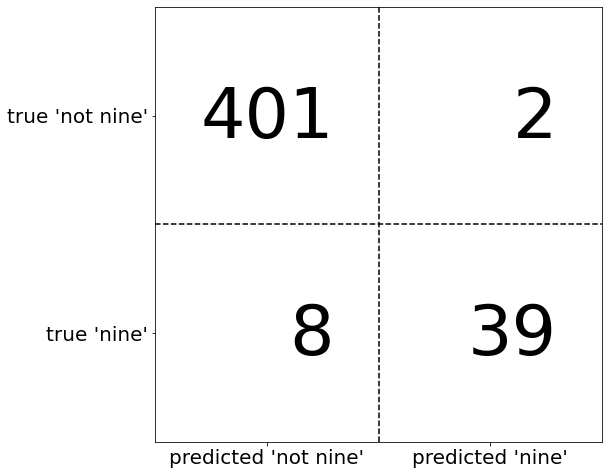

In [48]:
mglearn.plots.plot_confusion_matrix_illustration()

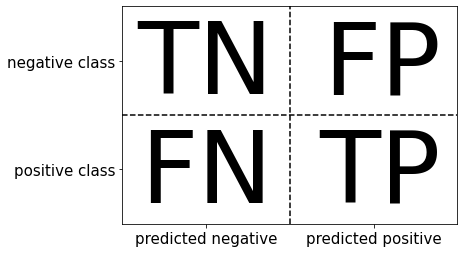

In [49]:
mglearn.plots.plot_binary_confusion_matrix()

In [51]:
print("Наиболее часто встречающийся класс:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nДамми-модель:")
print(confusion_matrix(y_test, pred_dummy))
print("\nДерево решений:")
print(confusion_matrix(y_test, pred_tree))
print("\nЛогистическая регрессия")
print(confusion_matrix(y_test, pred_logreg))

Наиболее часто встречающийся класс:
[[403   0]
 [ 47   0]]

Дамми-модель:
[[358  45]
 [ 42   5]]

Дерево решений:
[[390  13]
 [ 24  23]]

Логистическая регрессия
[[402   1]
 [  6  41]]


In [52]:
from sklearn.metrics import f1_score

print("f1-мера наибольшая частота: {:.2f}".format(
f1_score(y_test, pred_most_frequent)))
print("f1-мера дамми: {:.2f}".format(f1_score(y_test, 
                                              pred_dummy)))
print("f1-мера дерево: {:.2f}".format(f1_score(y_test, 
                                               pred_tree)))
print("f1-мера логистическая регрессия: {:.2f}".format(
f1_score(y_test, pred_logreg)))

f1-мера наибольшая частота: 0.00
f1-мера дамми: 0.10
f1-мера дерево: 0.55
f1-мера логистическая регрессия: 0.92


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent,
target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
print(classification_report(y_test, pred_dummy,
target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.89      0.89       403
        nine       0.10      0.11      0.10        47

    accuracy                           0.81       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.81      0.81       450



In [58]:
print(classification_report(y_test, pred_logreg,
target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


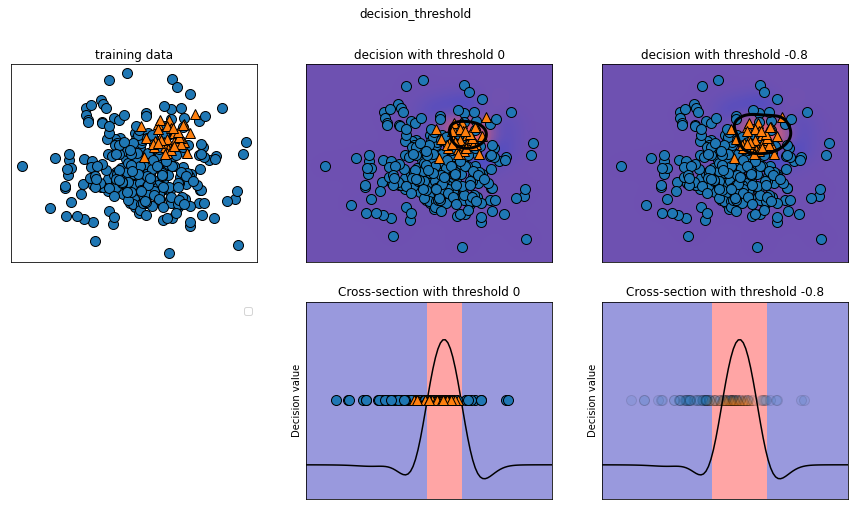

In [59]:
from mglearn.datasets import make_blobs

X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],
random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()

In [60]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [62]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [63]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113

